# What can we learn from twitter data? 

## Disclaimer
As we are working with uncensored tweets captured indiscriminately from Calgary, there is a possibility that this notebook may display content that is offensive or vulgar. These tweets do not represent the views of Cybera or its employees. This dataset is simply meant to be an activity in working with text-based data, and some possible analysis surrounding it.  

## Twitter Data

By now we have developed a familiarity with our Twitter data. At this point, we might be wondering what kind of questions we can answer or insights we can gain from this data. An exciting first choice is to ask ourselves something that we may all think of as familiar: how are we feeling today? But rather than asking _ourselves_ that question, we will extract that data from our Twitter data set. This is known as **Sentiment Analysis**.


Notice periodic behaviour

TODO: Clean plot/visualize it differently to show when the most popular tweeting hours/days are. Topic/Sentiment analysis on those days??? 

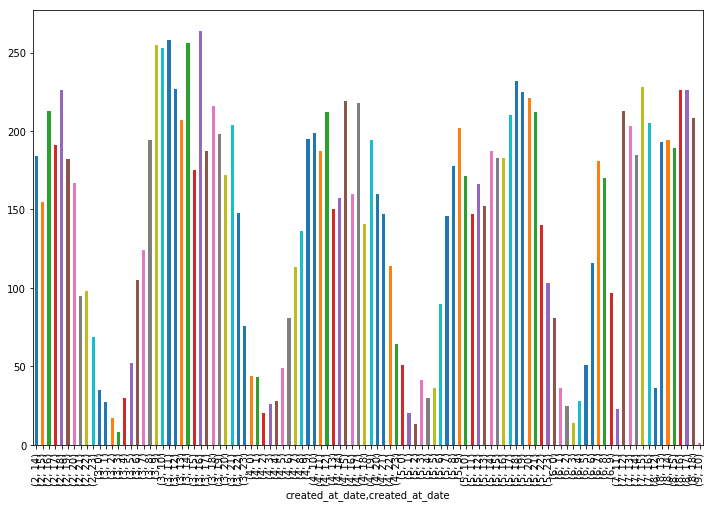

In [1]:
import pandas as pd
import urllib.request
import ast
import pandas as pd 

target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/tweets_cleaned.csv"
file_name="tweets_cleaned.csv"
urllib.request.urlretrieve(target_url, file_name)

df = pd.read_csv(file_name,parse_dates=['created_at_date']) 
import matplotlib.pyplot as plt
%matplotlib inline
#df.groupby([times.hour, times.minute]).value_col.sum()
df.created_at_date= df.created_at_date.dt.tz_localize('UTC').dt.tz_convert('MST')
df['created_at_date'].groupby([
            df.created_at_date.dt.day, 
            df.created_at_date.dt.hour
    ]).count().plot(kind="bar", figsize = (12,8))

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def compoundSentiment(row):
    score = analyser.polarity_scores(row.extended_tweet_cleaned)
    return score['compound']

df['score'] = df.apply(compoundSentiment, axis=1)

df.head()

,created_at_date,hashtags_string,user_string,user_location,lang,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned,score
0,2018-11-02 14:01:56-07:00,,Symin16,Toronto ✈ Calgary,en,NaN,NaN,♠,jessmayumba85,@Symin16 I’d like to know who,I’d like to know who,0.3612
1,2018-11-02 14:02:01-07:00,,TwoCanSamAdams,YYC,en,NaN,NaN,hannahrae cuddleslug,thimblewad,@TwoCanSamAdams Legit. There are still chunks ...,Legit. There are still chunks in the sink an...,-0.2263
2,2018-11-02 14:02:05-07:00,job Calgary SupplyChain Hiring CareerArc,,Calgary,en,51.004583,-114.007914,TMJ - CAL Manuf Jobs,tmj_cal_manuf,Can you recommend anyone for this #job in #Cal...,"Can you recommend anyone for this in , AB? ...",0.3612
3,2018-11-02 14:02:10-07:00,,,🌎📱,en,NaN,NaN,Sunny Rai,TheSunsRay,Kids See Ghosts: love this track,Kids See Ghosts: love this track,0.6369
4,2018-11-02 14:02:13-07:00,Calgary job,,Calgary,en,50.997882,-114.074005,TMJ-CAL Retail Jobs,tmj_cal_retail,"See our latest #Calgary, AB #job and click to ...","See our latest , AB and click to apply: bar...",0.0000


# Sentiment Analysis

Note all the cleaning (removing duplicate and things with coordinates (Those are typically adds TODO: Prove this) ) 

TODO: Find sentiment around a topic or something along those lines, however after cleaning we can probably start to find things in there. 

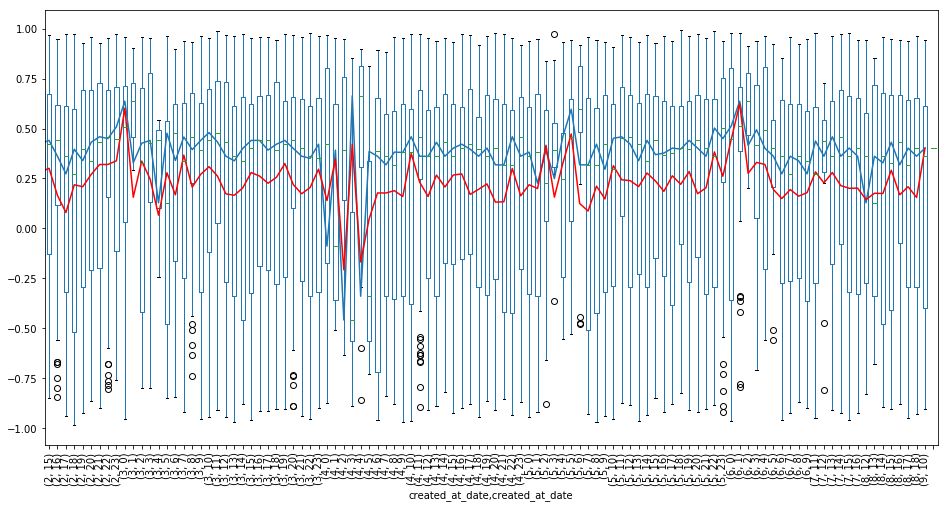

In [3]:
import seaborn as sns
s_df = df.drop_duplicates(subset='extended_tweet_cleaned', keep="last")
s_df = s_df[s_df.score !=0]
s_df = s_df[s_df.latitude.isnull()]
# sentiment_df = sentiment_df[sentiment_df.coordinates.isnull()]
median = s_df[['score', 
             'created_at_date']].groupby(
                            by=[
                                s_df.created_at_date.dt.day, 
                                s_df.created_at_date.dt.hour],
                            as_index=False)

ax = median['score'].boxplot(subplots=False, figsize = (16,8), rot = 90)
ax = s_df['score'].groupby([s_df.created_at_date.dt.day, 
                            s_df.created_at_date.dt.hour]).median().plot(kind='line', rot=90)

ax = s_df['score'].groupby([s_df.created_at_date.dt.day,
                           s_df.created_at_date.dt.hour]).mean().plot(kind='line', rot=90, color='r')


In [4]:
import numpy as np

TODO: scale this right so you can talk about potential periodic signals in the sentiment (you'll need to scale by sampling rate, when we aggregate that sampling rate is once an hour)

That said I don't think this actually shows anything as it assumes periodic signals because its an FFT and I think what we're seeing here is incomplete/we probably can't see it appropriatly. I'll probably cut this if I'm being completely honest. 

In [5]:
subset = df[df.created_at_date.dt.day ==3]
print(len(subset))
subset = subset[subset.screen_name != '311calgary'] #verhy formal reporting account, avoid those topics 
print(len(subset))
subset = subset.drop_duplicates(subset='extended_tweet_cleaned')
subset

3688
3592


,created_at_date,hashtags_string,user_string,user_location,lang,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned,score
1580,2018-11-03 00:00:10-07:00,,LFCTransferRoom,Canada,en,NaN,NaN,Captain Fantastic8,nattyroons,@LFCTransferRoom So what was Shaqiri's time🤔,So what was Shaqiri's time🤔,0.0000
1581,2018-11-03 00:01:18-07:00,ableg,realmarkwells,Calgary,en,NaN,NaN,Jeff Callaway,JeffCallaway,@realmarkwells NDP posturing #ableg,NDP posturing,0.0000
1582,2018-11-03 00:02:26-07:00,,GoaleeMurph kasim_a29 GalvanisdHockey,"Calgary, AB, Canada",en,NaN,NaN,FHumpires.com,fhumpires,@GoaleeMurph @kasim_a29 @GalvanisdHockey Glad ...,Glad I specified which keeper then witho...,0.4588
1583,2018-11-03 00:02:51-07:00,,,Calgary Alberta Canada,en,51.045000,-114.057000,Jennifer Park,naturaliconyyc,Sun worship💜💜💜. November is upon us. Not my fa...,Sun worship💜💜💜. November is upon us. Not my fa...,-0.3412
1584,2018-11-03 00:05:13-07:00,ATPZORRO LOVEYYC,ATPlive,"Calgary, AB",en,NaN,NaN,Alex Wihak,WihakAlex,@ATPlive I know it’s not a meme but how I feel...,I know it’s not a meme but how I feel someti...,0.0000
1585,2018-11-03 00:06:07-07:00,,,NaN,en,NaN,NaN,Pikachu THEATHEIST,AnomAtheist17,This video by Creationist Cat is fucking aweso...,This video by Creationist Cat is fucking aweso...,0.7346
1586,2018-11-03 00:07:33-07:00,,CarrieCnh12 andrewphung KimsConvenience bitter...,Calgary,en,NaN,NaN,Julie Van Rosendaal,dinnerwithjulie,@CarrieCnh12 @andrewphung @KimsConvenience @bi...,❤️he’s just the best!,0.6696
1587,2018-11-03 00:09:00-07:00,,LeroyEdwards8 Henry14Kay jasperlfc marcialynnj...,Canada,en,NaN,NaN,Captain Fantastic8,nattyroons,@LeroyEdwards8 @Henry14Kay @jasperlfc @marcial...,Thanks Ler...,0.7213
1588,2018-11-03 00:12:05-07:00,,,Canada,en,NaN,NaN,Captain Fantastic8,nattyroons,What time is our game today..My LFC Family😎,What time is our game today..My LFC Family😎,0.0000
1589,2018-11-03 00:13:28-07:00,,MMFlint,"British Columbia, Canada",en,NaN,NaN,RJ Spear,spearitofgf,"@MMFlint Sorry Michael, but there were four me...","Sorry Michael, but there were four medical s...",0.9009


# TODO: Sentiment of a topic? 

In [6]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk

In [7]:
def sent_to_words(row):
    sentence = row.extended_tweet_cleaned
    return(gensim.utils.simple_preprocess(sentence,min_len=3))  

subset['tokens'] = subset.apply(sent_to_words, axis=1)
subset['tokens']
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alextennant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alextennant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
stop_words.append('amp')
stop_words = set(stop_words)


In [9]:
def tokens_to_lda(row):
    data_token = row.tokens
    tokens = [token for token in data_token if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens
    
subset['lemma'] = subset.apply(tokens_to_lda, axis=1)

subset = subset[subset['lemma'].apply(lambda x: len(x) > 3)]
from gensim import corpora

dictionary = corpora.Dictionary(subset['lemma'])
corpus = [dictionary.doc2bow(text) for text in subset['lemma']]

In [10]:
subset[subset['lemma'].apply(lambda x: len(x) > 4)]

,created_at_date,hashtags_string,user_string,user_location,lang,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned,score,tokens,lemma
1582,2018-11-03 00:02:26-07:00,,GoaleeMurph kasim_a29 GalvanisdHockey,"Calgary, AB, Canada",en,NaN,NaN,FHumpires.com,fhumpires,@GoaleeMurph @kasim_a29 @GalvanisdHockey Glad ...,Glad I specified which keeper then witho...,0.4588,"[glad, specified, which, keeper, then, without...","[glad, specify, keeper, without, reference, di..."
1583,2018-11-03 00:02:51-07:00,,,Calgary Alberta Canada,en,51.045000,-114.057000,Jennifer Park,naturaliconyyc,Sun worship💜💜💜. November is upon us. Not my fa...,Sun worship💜💜💜. November is upon us. Not my fa...,-0.3412,"[sun, worship, november, upon, not, fave, mont...","[sun, worship, november, upon, fave, month, sc..."
1584,2018-11-03 00:05:13-07:00,ATPZORRO LOVEYYC,ATPlive,"Calgary, AB",en,NaN,NaN,Alex Wihak,WihakAlex,@ATPlive I know it’s not a meme but how I feel...,I know it’s not a meme but how I feel someti...,0.0000,"[know, not, meme, but, how, feel, sometimes, f...","[know, meme, feel, sometimes, father]"
1585,2018-11-03 00:06:07-07:00,,,NaN,en,NaN,NaN,Pikachu THEATHEIST,AnomAtheist17,This video by Creationist Cat is fucking aweso...,This video by Creationist Cat is fucking aweso...,0.7346,"[this, video, creationist, cat, fucking, awesome]","[video, creationist, cat, fucking, awesome]"
1588,2018-11-03 00:12:05-07:00,,,Canada,en,NaN,NaN,Captain Fantastic8,nattyroons,What time is our game today..My LFC Family😎,What time is our game today..My LFC Family😎,0.0000,"[what, time, our, game, today, lfc, family]","[time, game, today, lfc, family]"
1589,2018-11-03 00:13:28-07:00,,MMFlint,"British Columbia, Canada",en,NaN,NaN,RJ Spear,spearitofgf,"@MMFlint Sorry Michael, but there were four me...","Sorry Michael, but there were four medical s...",0.9009,"[sorry, michael, but, there, were, four, medic...","[sorry, michael, four, medical, school, ontari..."
1594,2018-11-03 00:16:50-07:00,,,NaN,en,NaN,NaN,brandoB,brandonbarcenaa,Yesterday patience asked me “this Sunday is sa...,Yesterday patience asked me “this Sunday is sa...,0.0000,"[yesterday, patience, asked, this, sunday, say...","[yesterday, patience, ask, sunday, saylights, ..."
1596,2018-11-03 00:17:05-07:00,,JILLCLARK1808 AnfieldMyLife liverpool19800 mik...,Canada,en,NaN,NaN,Captain Fantastic8,nattyroons,@JILLCLARK1808 @AnfieldMyLife @liverpool19800 ...,Good Morning Beautiful😘😘...,0.7430,"[good, morning, beautiful, winning, matchday, ...","[good, morning, beautiful, winning, matchday, ..."
1597,2018-11-03 00:19:17-07:00,,Henry14Kay LeroyEdwards8 jasperlfc marcialynnj...,Canada,en,NaN,NaN,Captain Fantastic8,nattyroons,@Henry14Kay @LeroyEdwards8 @jasperlfc @marcial...,Good Morni...,0.7430,"[good, morning, beautiful, winning, matchday, ...","[good, morning, beautiful, winning, matchday, ..."
1598,2018-11-03 00:19:19-07:00,,,"Calgary, Alberta",en,NaN,NaN,Jenya,Squishy_J88,Bedtime is her favourite time. She uses these ...,Bedtime is her favourite time. She uses these ...,0.4588,"[bedtime, her, favourite, time, she, uses, the...","[bedtime, favourite, time, use, eight, hours, ..."


In [89]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    # path the the methdod we will be using for LDA analysis 
    mallet_path = 'mallet-2.0.8/bin/mallet'
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, 
                                                 corpus=corpus, 
                                                 num_topics=num_topics, 
                                                 id2word=dictionary,
                                                 workers=8,
                                                 optimize_interval = 50,
                                                 iterations = 200)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [90]:
# Can take a long time to run.


model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus, 
                                                        texts=subset['lemma'],
                                                        start=30,
                                                        limit=80, 
                                                        step=10)



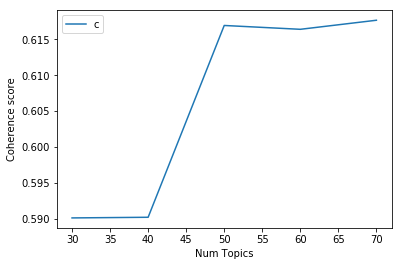

In [91]:
limit=80; start=30; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [148]:
def format_topics_sentences(ldamodel=model_list[len(model_list)-1], 
                            corpus=corpus, 
                            texts=subset['extended_tweet'],
                            score=subset.score):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        # Here we grab a list of topics, and their contributions to the model
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, and how much it contributes. The first index is
        # the dominant topic. 
        topic_num, prop_topic = row[0] 
        
        # Gather words important to the topic
        wp = ldamodel.show_topic(topic_num) 
        topic_keywords = ", ".join([word for word, prop in wp])
        # Save them to our data frame
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                          round(prop_topic,4), 
                                                          topic_keywords]), 
                                               ignore_index=True)

    sent_topics_df.columns = ['topic', 'percent', 'keywords']

    # Add original text and sentiment to the data frame 
    contents = pd.Series(texts)
    score = pd.Series(score)
    sent_topics_df = pd.concat([sent_topics_df, contents, score],axis=1)
    
    
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[3], 
                                                  corpus=corpus, 
                                                  texts=subset['extended_tweet'].values.tolist(),
                                                  score=subset.reset_index().score)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['number', 'topic', 'percent', 'keywords', 'tweet', 'score']

# Show
df_dominant_topic.head(10)

,number,topic,percent,keywords,tweet,score
0,0,11.0,0.0319,"book, food, awesome, person, ready, local, swe...",@GoaleeMurph @kasim_a29 @GalvanisdHockey Glad ...,0.4588
1,1,19.0,0.0450,"month, bad, order, comment, answer, lol, poten...",Sun worship💜💜💜. November is upon us. Not my fa...,-0.3412
2,2,3.0,0.0346,"watching, son, power, score, movie, run, leagu...",@ATPlive I know it’s not a meme but how I feel...,0.0000
3,3,38.0,0.0434,"happy, kid, birthday, phone, girl, cat, cut, t...",This video by Creationist Cat is fucking aweso...,0.7346
4,4,0.0,0.0333,"game, tonight, move, action, calling, remember...",What time is our game today..My LFC Family😎,0.0000
5,5,4.0,0.0463,"canada, canadian, base, listening, hope, park,...","@MMFlint Sorry Michael, but there were four me...",0.9009
6,6,52.0,0.0374,"play, big, playing, early, complete, yesterday...",Yesterday patience asked me “this Sunday is sa...,0.0000
7,7,33.0,0.0757,"morning, friend, week, family, beautiful, amer...",@JILLCLARK1808 @AnfieldMyLife @liverpool19800 ...,0.7430
8,8,33.0,0.0838,"morning, friend, week, family, beautiful, amer...",@Henry14Kay @LeroyEdwards8 @jasperlfc @marcial...,0.7430
9,9,26.0,0.0456,"day, case, ticket, public, forward, live, full...",Bedtime is her favourite time. She uses these ...,0.4588


array(['book, food, awesome, person, ready, local, sweet, business, bring, blazer',
       'month, bad, order, comment, answer, lol, potential, hot, christian, understand',
       'watching, son, power, score, movie, run, league, mom, hands, robot',
       'happy, kid, birthday, phone, girl, cat, cut, teach, dog, lots',
       'game, tonight, move, action, calling, remember, blackhawks, cookie, stream, party',
       'canada, canadian, base, listening, hope, park, level, gun, cole, fan',
       'play, big, playing, early, complete, yesterday, list, god, afford, sunrise',
       'morning, friend, week, family, beautiful, american, lady, busy, debate, bless',
       'day, case, ticket, public, forward, live, full, word, annoying, share',
       'thing, community, care, centre, taking, toronto, fed, coming, ontario, immigrant',
       'enjoy, include, sign, blue, train, love, visit, stupid, door, beautiful',
       'work, details, check, helping, big, scarf, favourite, instagram, collecti

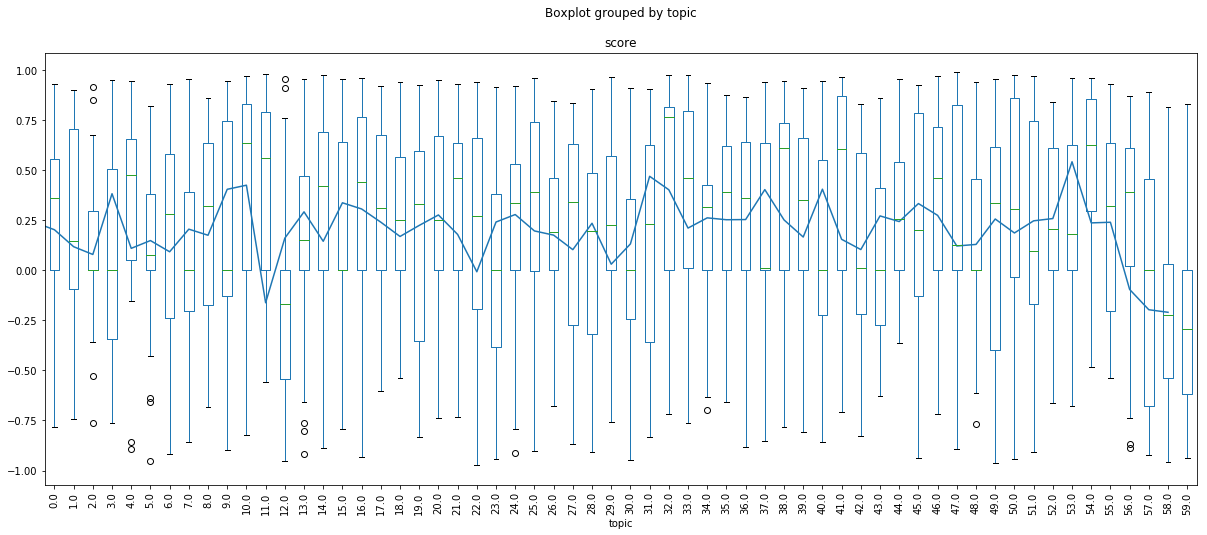

In [149]:
ax = df_dominant_topic.boxplot(figsize = (20,8), column=['score'], by='topic', rot=90)
df_dominant_topic.groupby('topic')['score'].mean().plot(kind='line', ax= ax, rot=90)


In [147]:
for text in df_dominant_topic[df_dominant_topic.topic == 54].tweet:
    print(text)
    print()

@MMFlint Sorry Michael, but there were four medical schools in Ontario around the time of your Grandfathers birth. So he could have went to a school in Ontario but something else must have made him go to Michigan. I with most of Canada hope the Dems have a great Tuesday!

@BoRhapMovie was sensational... Freddie Mercury and @QueenWillRock  are iconic and have left a lasting impression on modern culture. Now, going home to listen to my vinyl! #BohemianRhapsodyMovie #onceisnotenough

@JoclynC @JoclynC thanks for pointing this out! GREAT article

@CFL_News @G18Hurricane @espn @Nikarax Where was he when we needed a lineman in Detroit? He would have fit right in!

This #job might be a great fit for you: Store Associate, Temp, Winners North Hill -  #Retail #Calgary, AB #Hiring #CareerArc

Crowfoot #mountain emerging from the clouds over Bow Lake. #Alberta #Canada #ExploreCanada #wanderlust #landscape #landscapephotography #landscape_captures #landscape_lovers #nature #naturelovers #Travel #ph

2528

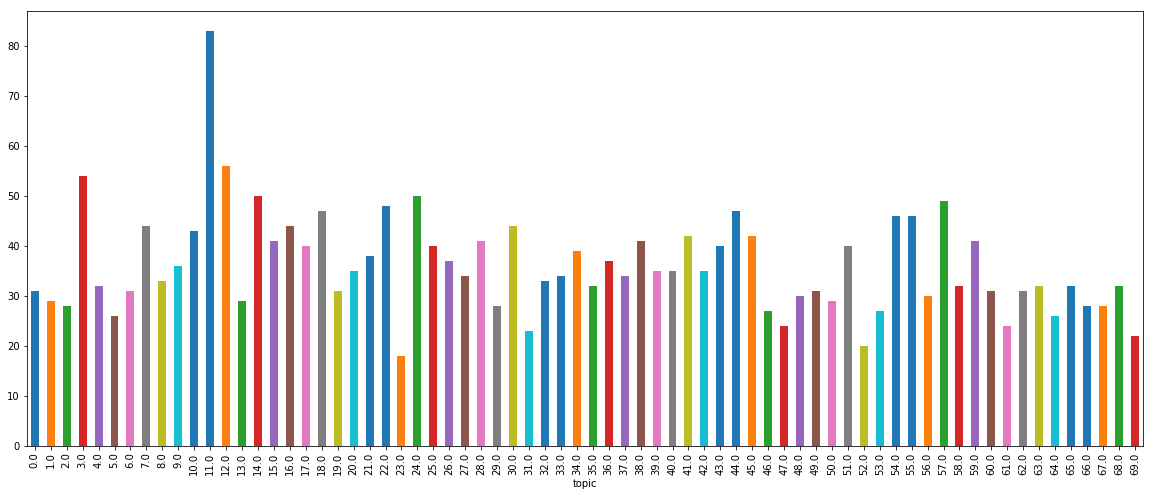

In [146]:
df_dominant_topic.groupby('topic')['score'].count().plot(kind='bar', figsize=(20,8))